In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from toolbox import series_screw as ss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [13]:
savings = np.array([[4.9],[5.2],[5.7],[5.7],[6.2],[6.7],[6.9],[7.1],[6.6],[7. ],[6.9],[6.4],[6.6],[6.4],[7. ],[7.3],[6. ],[6.3],[4.8],[5.3],[5.4],[4.7],[4.9],[4.4],[5.1],[5.3],[6. ],[5.9],[5.9],[5.6],[5.3],[4.5],[4.7],[4.6],[4.3],[5. ],[5.2],[6.2],[5.8],[6.7],[5.7],[6.1],[7.2],[6.5],[6.1],[6.3],[6.4],[7. ],[7.6],[7.2],[7.5],[7. ],[7.6],[7.2],[7.5],[7.8],[7.2],[7.5],[5.6],[5.7],[4.9],[5.1],[6.2],[6. ],[6.1],[7.5],[7.8],[8. ],[8. ],[8.1],[7.6],[7.1],[6.6],[5.6],[5.9],[6.6],[6.8],[7.8],[7.9],[8.7],[7.7],[7.3],[6.7],[7.5],[6.4],[9.7],[7.5],[7.1],[6.4],[6. ],[5.7],[5. ],[4.2],[5.1],[5.4],[5.1],[5.3],[5. ],[4.8],[4.7],[5. ],[5.4]])
index = np.array(['1955-01-01T00:00:00.000000000', '1955-04-01T00:00:00.000000000',
       '1955-07-01T00:00:00.000000000', '1955-10-01T00:00:00.000000000',
       '1956-01-01T00:00:00.000000000', '1956-04-01T00:00:00.000000000',
       '1956-07-01T00:00:00.000000000', '1956-10-01T00:00:00.000000000',
       '1957-01-01T00:00:00.000000000', '1957-04-01T00:00:00.000000000',
       '1957-07-01T00:00:00.000000000', '1957-10-01T00:00:00.000000000',
       '1958-01-01T00:00:00.000000000', '1958-04-01T00:00:00.000000000',
       '1958-07-01T00:00:00.000000000', '1958-10-01T00:00:00.000000000',
       '1959-01-01T00:00:00.000000000', '1959-04-01T00:00:00.000000000',
       '1959-07-01T00:00:00.000000000', '1959-10-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '1960-04-01T00:00:00.000000000',
       '1960-07-01T00:00:00.000000000', '1960-10-01T00:00:00.000000000',
       '1961-01-01T00:00:00.000000000', '1961-04-01T00:00:00.000000000',
       '1961-07-01T00:00:00.000000000', '1961-10-01T00:00:00.000000000',
       '1962-01-01T00:00:00.000000000', '1962-04-01T00:00:00.000000000',
       '1962-07-01T00:00:00.000000000', '1962-10-01T00:00:00.000000000',
       '1963-01-01T00:00:00.000000000', '1963-04-01T00:00:00.000000000',
       '1963-07-01T00:00:00.000000000', '1963-10-01T00:00:00.000000000',
       '1964-01-01T00:00:00.000000000', '1964-04-01T00:00:00.000000000',
       '1964-07-01T00:00:00.000000000', '1964-10-01T00:00:00.000000000',
       '1965-01-01T00:00:00.000000000', '1965-04-01T00:00:00.000000000',
       '1965-07-01T00:00:00.000000000', '1965-10-01T00:00:00.000000000',
       '1966-01-01T00:00:00.000000000', '1966-04-01T00:00:00.000000000',
       '1966-07-01T00:00:00.000000000', '1966-10-01T00:00:00.000000000',
       '1967-01-01T00:00:00.000000000', '1967-04-01T00:00:00.000000000',
       '1967-07-01T00:00:00.000000000', '1967-10-01T00:00:00.000000000',
       '1968-01-01T00:00:00.000000000', '1968-04-01T00:00:00.000000000',
       '1968-07-01T00:00:00.000000000', '1968-10-01T00:00:00.000000000',
       '1969-01-01T00:00:00.000000000', '1969-04-01T00:00:00.000000000',
       '1969-07-01T00:00:00.000000000', '1969-10-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-04-01T00:00:00.000000000',
       '1970-07-01T00:00:00.000000000', '1970-10-01T00:00:00.000000000',
       '1971-01-01T00:00:00.000000000', '1971-04-01T00:00:00.000000000',
       '1971-07-01T00:00:00.000000000', '1971-10-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1972-04-01T00:00:00.000000000',
       '1972-07-01T00:00:00.000000000', '1972-10-01T00:00:00.000000000',
       '1973-01-01T00:00:00.000000000', '1973-04-01T00:00:00.000000000',
       '1973-07-01T00:00:00.000000000', '1973-10-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1974-04-01T00:00:00.000000000',
       '1974-07-01T00:00:00.000000000', '1974-10-01T00:00:00.000000000',
       '1975-01-01T00:00:00.000000000', '1975-04-01T00:00:00.000000000',
       '1975-07-01T00:00:00.000000000', '1975-10-01T00:00:00.000000000',
       '1976-01-01T00:00:00.000000000', '1976-04-01T00:00:00.000000000',
       '1976-07-01T00:00:00.000000000', '1976-10-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1977-04-01T00:00:00.000000000',
       '1977-07-01T00:00:00.000000000', '1977-10-01T00:00:00.000000000',
       '1978-01-01T00:00:00.000000000', '1978-04-01T00:00:00.000000000',
       '1978-07-01T00:00:00.000000000', '1978-10-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1979-04-01T00:00:00.000000000',
       '1979-07-01T00:00:00.000000000', '1979-10-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1980-04-01T00:00:00.000000000'])

In [15]:
savings = pd.DataFrame(savings,index=index,columns=['savings'])

In [16]:
savings

,savings
1955-01-01T00:00:00.000000000,4.9
1955-04-01T00:00:00.000000000,5.2
1955-07-01T00:00:00.000000000,5.7
1955-10-01T00:00:00.000000000,5.7
1956-01-01T00:00:00.000000000,6.2
...,...
1979-04-01T00:00:00.000000000,5.0
1979-07-01T00:00:00.000000000,4.8
1979-10-01T00:00:00.000000000,4.7
1980-01-01T00:00:00.000000000,5.0


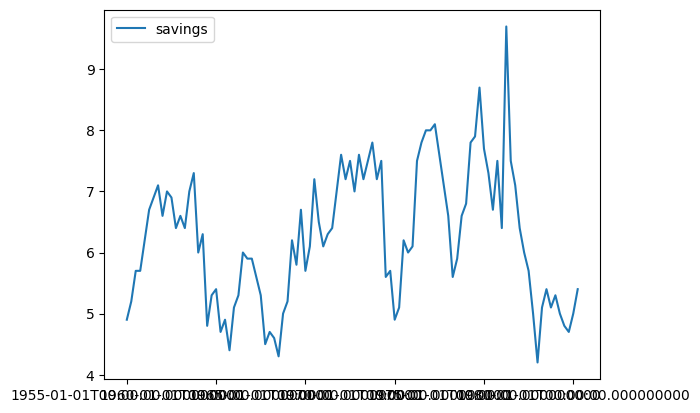

p_value: 0.020815541644114092 rejeita-se Ho. Esta séries é estacionária
_


In [22]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = ss.adfuller_eval_sta(savings)

# Print test statistic
print(result)

# Print p-value
print(result[1])

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


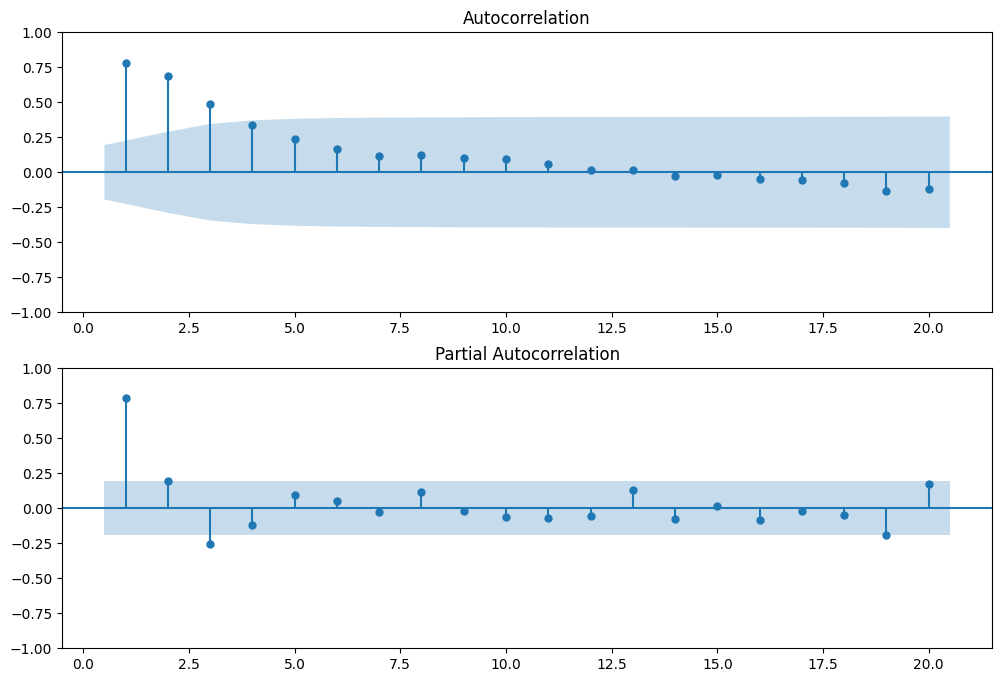

In [23]:
ss.acf_pacf(savings,lags=20)

Talvez seja um AR ou um ARMA

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p,q) model
            model = ARIMA(savings, order=(p,0,q))
            results = model.fit()

            # Print p, q, AIC, BIC
            print(p,q,results.aic,results.bic)

        except:
            print(p, q, None, None)

0 0 313.6028657381061 318.85281136467466
0 1 267.06970980844704 274.94462824829986
0 2 232.1678267736381 242.6677180267752
0 3 217.59720509753393 230.72206916395527
1 0 216.203479563773 224.0783980036258
1 1 215.7003889529165 226.2002802060536
1 2 207.65298384447547 220.7778479108968
1 3 209.57498315813947 225.3248200378451
2 0 213.97232199692382 224.47221325006092
2 1 213.43035867875878 226.55522274518012
2 2 209.57903144324186 225.32886832294747
2 3 211.57498195129355 229.94979164428344
3 0 209.5449293671731 222.66979343359446
3 1 210.8214728490309 226.57130972873654
3 2 211.45759548498899 229.83240517797887
3 3 213.35650857574822 234.35629108202238


In [33]:
import seaborn as sns

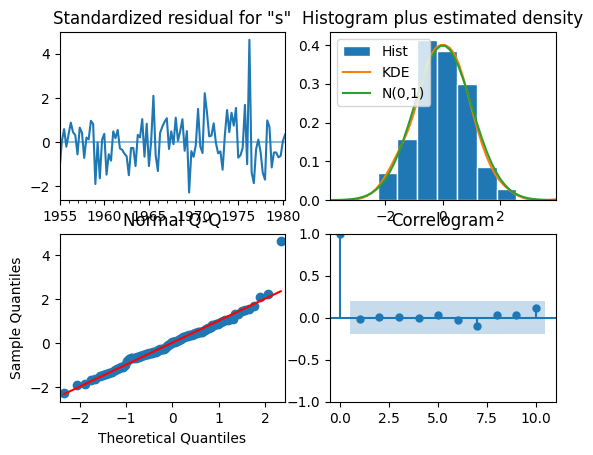

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
Date:                Thu, 26 Jan 2023   AIC                            207.653
Time:                        17:48:22   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949      0.323     19.169      0.000       5.561       6.828
ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
ma.L1         -0.0538      0.145     -0.370      0.7

In [39]:
# Create and fit model
model = ARIMA(savings,order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())

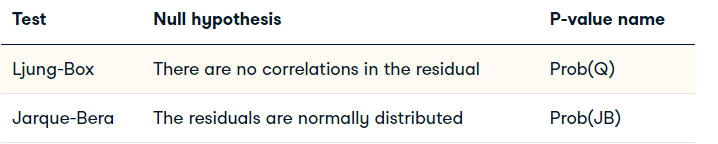

In [ ]:
# Um ponto tirou a normalidade

In [41]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
milk_production = pd.read_csv('./data/milk_production.csv',index_col='date',parse_dates=True)

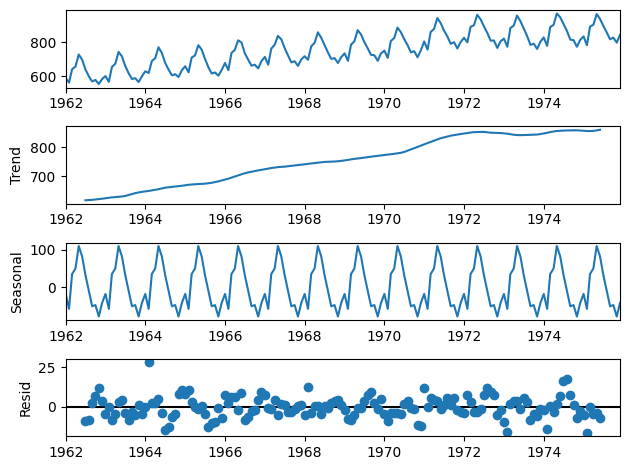

In [45]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [60]:
water = pd.read_csv('./data/water.csv',index_col='Unnamed: 0',parse_dates=True)

In [61]:
water

,water_consumers
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313
...,...
1993-12-01,32256
1994-01-01,27517
1994-02-01,33454
1994-03-01,38539


<AxesSubplot: >

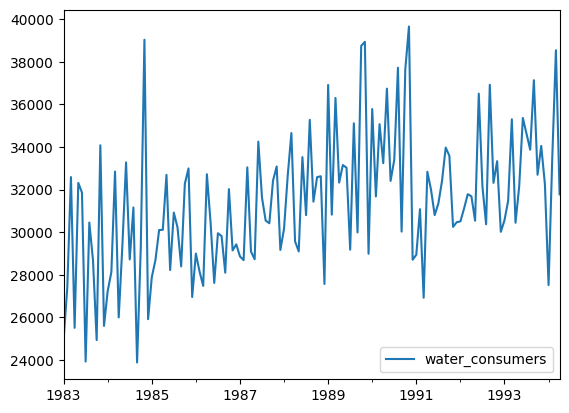

In [62]:
water.plot()

In [63]:
ss.adfuller_eval_sta(water)

'p_value: 0.613163521611131 não podemos rejeitar Ho. Série Não Estacionária'

In [86]:
water_diff = water.pct_change().dropna()

In [87]:
ss.adfuller_eval_sta(water_diff)

'p_value: 0.05855269978465386 não podemos rejeitar Ho. Série Não Estacionária'

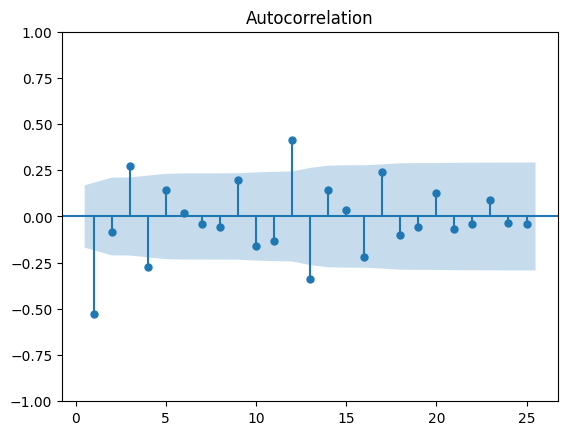

In [88]:
# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_diff, lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

Podemos ver picos para achar componente sazonal, no 12 temos um retorno para o pico, ou seja sazonalidade periodo de 12